In [7]:
import os
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})

In [17]:
data_path = 'data'
f_name_list = os.listdir(data_path)
label_dir={
    'PINN_sin':'PINNs(sin)',
    'PINN_tanh':'PINNs(Tanh)',
    'one_phase':'TCNN (one phase)',
    'two_phase':'TCNN (two phase)',
    'tcnn_ToC':'TCNN (ToC)'
}
f_name_list

['grid_one_phase.txt',
 'grid_two_phase.txt',
 'grid_two_phase0.txt',
 'grid_two_phase1-16.txt',
 'grid_two_phase1.txt',
 'PINN(Tanh).txt']

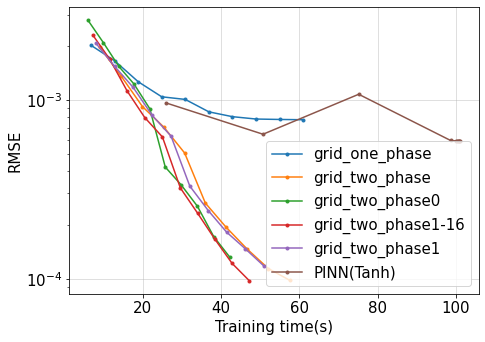

In [18]:
w = 50
fig = plt.figure(figsize=(7,5))
for f_name in f_name_list:
    f_info = f_name.split(".txt")[0]
    label = f_info#label_dir[f_info]
    plot_data = np.loadtxt(os.path.join(data_path,f_name))
    plt.plot(plot_data[:,0],plot_data[:,-1], 
             label = label, marker = '.')
    # plt.scatter(plot_data[-1,0],plot_data[-1,1], s= 15)
plt.xlabel("Training time(s)")
plt.ylabel("RMSE")
# plt.xscale("log")
plt.yscale("log")
plt.grid(alpha = 0.5)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
# plt.title("B.C. = cos({}x+{}y)".format(w,w))
fig.tight_layout()
# plt.savefig("figs/NC_P1.jpg".format(w),dpi = 500)
plt.show()

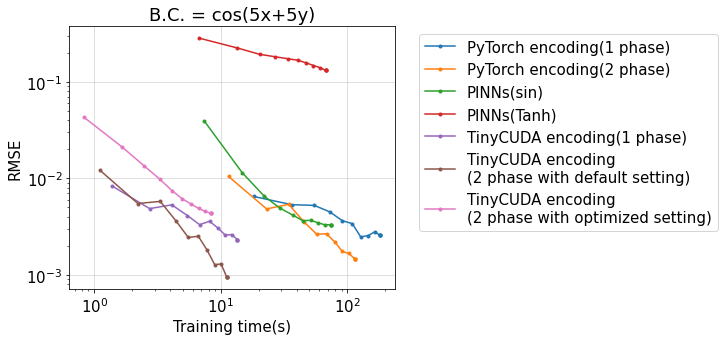

In [65]:
w = 5
fig = plt.figure(figsize=(10.5,5))
for f_name in f_name_list:
    f_info = f_name.split(".txt")[0].split("_")
    f_w = f_info[-1].split('w')[-1]
    if f_w != str(w):
        continue
    label = label_dir[f_info[0]]
#     print(f_name,label)
    if "encoding" in label:
        phase_info = f_info[1]
        if len(f_info) >3:
            hp_info = f_info[2]
            label = label + "\n({} phase with {} setting)".format(phase_info,hp_info)
        else:
            label = label + "({} phase)".format(phase_info)

    plot_data = np.loadtxt(data_path + f_name)
    plt.plot(plot_data[:,0],plot_data[:,1], 
             label = label, marker = '.')
    plt.scatter(plot_data[-1,0],plot_data[-1,1], s= 12)
plt.xlabel("Training time(s)")
plt.ylabel("RMSE")
plt.xscale("log")
plt.yscale("log")
plt.grid(alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("B.C. = cos({}x+{}y)".format(w,w))
fig.tight_layout()
plt.savefig("figs/w={}.jpg".format(w),dpi = 500)
plt.show()